📥 Loading Dataset...
✅ Dataset Loaded Successfully!

   Exam1_Score  Exam2_Score  Admitted
0    34.623660    78.024693         0
1    30.286711    43.894998         0
2    35.847409    72.902198         0
3    60.182599    86.308552         1
4    79.032736    75.344376         1

🔍 Checking for missing values:
Exam1_Score    0
Exam2_Score    0
Admitted       0
dtype: int64


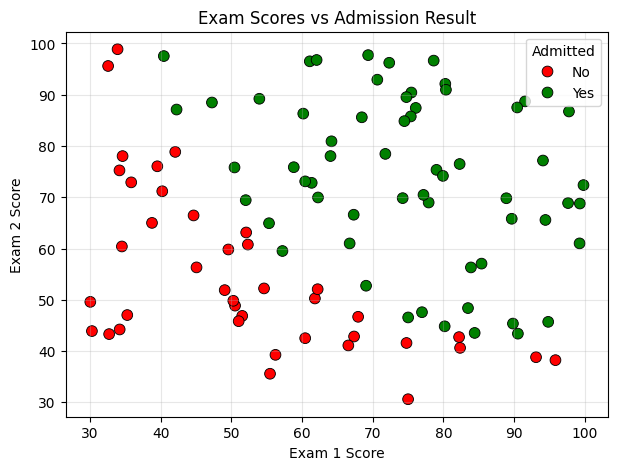


⚙️ Building Logistic Regression Model...

✅ Model Trained Successfully!

📊 Model Evaluation Results
Accuracy: 80.00%

Confusion Matrix:
 [[7 1]
 [3 9]] 

Detailed Classification Report:

   precision  recall  f1-score  support
1       0.70    0.88      0.78      8.0
2       0.90    0.75      0.82     12.0
3       0.80    0.80      0.80      0.8
4       0.80    0.81      0.80     20.0
5       0.82    0.80      0.80     20.0


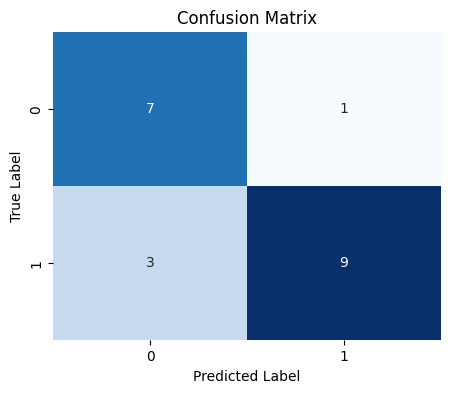


🎨 Plotting Decision Boundary...


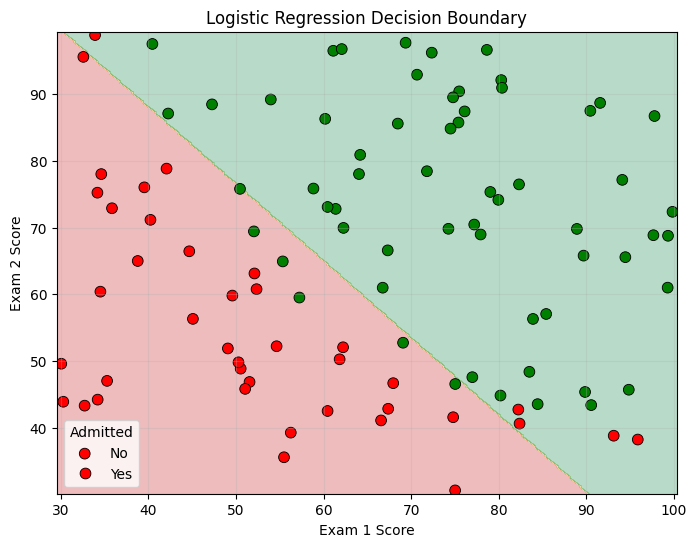


✅ Logistic Regression Lab Completed Successfully!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)
from termcolor import colored

# -------------------------------
# 1️⃣ Data Preprocessing
# -------------------------------
print(colored("📥 Loading Dataset...", "cyan", attrs=["bold"]))

# Load dataset (adjust path if needed)
df = pd.read_csv("/content/ex2data1.txt", header=None)
df.columns = ["Exam1_Score", "Exam2_Score", "Admitted"]

print(colored("✅ Dataset Loaded Successfully!\n", "green", attrs=["bold"]))
print(df.head())

# Check for missing values
print(colored("\n🔍 Checking for missing values:", "yellow"))
print(df.isnull().sum())

# -------------------------------
# 📊 Scatter Plot (Corrected Colors)
# -------------------------------
plt.figure(figsize=(7, 5))

# Custom palette: 0 = No (red), 1 = Yes (green)
palette = {0: "red", 1: "green"}

sns.scatterplot(
    data=df,
    x="Exam1_Score",
    y="Exam2_Score",
    hue="Admitted",
    palette=palette,
    s=60,
    edgecolor="k"
)

plt.title("Exam Scores vs Admission Result")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")

# Correct legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["No", "Yes"], title="Admitted")

plt.grid(alpha=0.3)
plt.show()

# -------------------------------
# 2️⃣ Model Building
# -------------------------------
print(colored("\n⚙️ Building Logistic Regression Model...", "cyan", attrs=["bold"]))

X = df[["Exam1_Score", "Exam2_Score"]].values
y = df["Admitted"].values

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print(colored("\n✅ Model Trained Successfully!", "green", attrs=["bold"]))

# -------------------------------
# 3️⃣ Model Evaluation
# -------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose().round(2)
report_df.index = np.arange(1, len(report_df) + 1)

print(colored("\n📊 Model Evaluation Results", "magenta", attrs=["bold"]))
print("Accuracy:", colored(f"{accuracy * 100:.2f}%", "green", attrs=["bold"]))
print("\nConfusion Matrix:\n", cm, "\n")

print(colored("Detailed Classification Report:\n", "blue", attrs=["bold"]))
print(report_df.to_string(index=True))

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -------------------------------
# 4️⃣ Visualization of Decision Boundary
# -------------------------------
print(colored("\n🎨 Plotting Decision Boundary...", "cyan", attrs=["bold"]))

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')  # Red-Yellow-Green for clarity

sns.scatterplot(
    data=df,
    x="Exam1_Score",
    y="Exam2_Score",
    hue="Admitted",
    palette={0: "red", 1: "green"},
    s=60,
    edgecolor="k"
)

plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(title="Admitted", labels=["No", "Yes"])
plt.grid(alpha=0.3)
plt.show()

print(colored("\n✅ Logistic Regression Lab Completed Successfully!", "green", attrs=["bold"]))
